In [3]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
bempp.core.opencl_kernels.set_default_device(0,0)#bempp.api.enable_console_logging()

Setting the size of the element of the mesh and the center of the two spheres. The radius of the sphere is 1 and the distance between the boundary of them if 1. (Z/R=1)

In [6]:
h = 0.1
center1 = (1.75, 0, 0) # center of one sphere
center2 = (-1.75, 0, 0) 

sphere1 = bempp.api.shapes.sphere(h = h, origin = center1)
sphere2 = bempp.api.shapes.sphere(h = h, origin = center2)

Construct RWG and SNC in difference spaces.

In [7]:
rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

We are defining an exponentially adapted trapezoid rule and choose the quadrature points accordingly.

In [14]:
N = 15
lbound = .005
ubound = 10
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), N)
results = np.empty(N, dtype='float64')
    
for index2, point in enumerate(quad_points):

    wavenumber = -1j * np.log(point)

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))

    A = np.linalg.inv(mat2).dot(mat)

    sign, logdet = slogdet(A)
    results[index2] = logdet
    print(logdet)

6.89004409082371e-13
-2.3405140950316906e-05
-0.00016622762439217782
-0.0005001998699049221
-0.0010511806833187157
-0.0018014067148592575
-0.0026943625693405856
-0.003645137320911288
-0.004557238564308102
-0.0053441482306812735
-0.005950440442467621
-0.006364397391848925
-0.006614149750557726
-0.0067451375210862575
-0.00679174350467729


In [15]:
casimir_energy = np.trapz(-results / quad_points, quad_points) / (2 * np.pi)
print(f"The normalized Casimir Energy is: {casimir_energy}")

The normalized Casimir Energy is: 0.0008777888430670014


In [1]:
%matplotlib inline
from matplotlib.pyplot import figure

Text(0, 0.5, 'The value of the integrand')

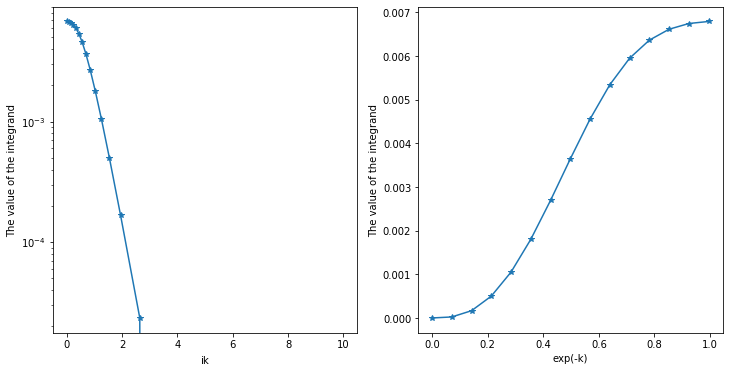

In [16]:
fig = figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('$\mathrm{i}$k')
ax1.set_ylabel('The value of the integrand')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('exp(-k)')
ax1.semilogy(-np.log(quad_points), -results, '*-')
ax2.plot(quad_points, -results, '*-')
ax2.set_ylabel('The value of the integrand')
#fig.tight_layout()
#the relative log determinant with increasing imaginary wavenumber. The right plot uses a scale appropriate for the trapezoid quadrature rule.

In [17]:
compensation1 = (results[-1] * np.log(quad_points[-1]))/(2*np.pi)
print(compensation1)

5.404697754908313e-06


In [18]:
casimir_energy + compensation1

0.0008831935408219097

In [27]:
np.exp(2*1.5*np.log(quad_points[1]))/3

0.00011988167627856935

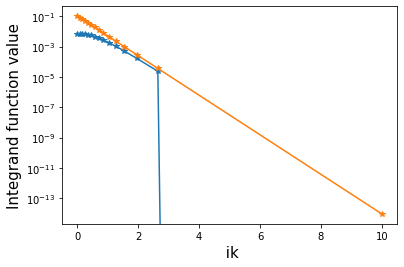

In [20]:
#results_test = np.exp(2*np.log(quad_points))
#plt.figure(figsize=(10,6))
plt.semilogy(-np.log(quad_points), -results, '*-')
plt.semilogy(-np.log(quad_points), 0.1*np.exp(2*1.5*np.log(quad_points)), '*-')
#plt.semilogy(-np.log(quad_points), results_test, '*-')
plt.xlabel(' ik',fontsize = 15)
plt.ylabel('Integrand function value',fontsize = 15)
plt.savefig('integrand_value_decay2.pdf',bbox_inches='tight')

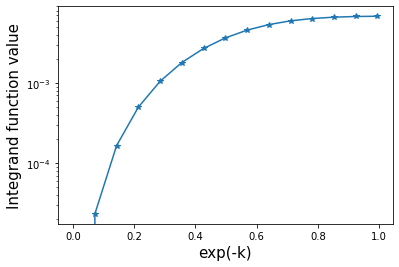

In [21]:
plt.semilogy(quad_points, -results, '*-')
plt.xlabel('exp(-k)', fontsize = 15)
plt.ylabel('Integrand function value', fontsize = 15)
plt.savefig('integrand_value_not_decay.pdf',bbox_inches='tight')

In [38]:
op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, 0.000005*1j)
op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, 0.000005*1j)
op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, 0.000005*1j)
op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, 0.000005*1j)

mat11 = op11.weak_form().A
mat12 = op12.weak_form().A
mat21 = op21.weak_form().A
mat22 = op22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))

A = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(A)
print(logdet)

-2.0152150720391


In [39]:
6.38 * 0.13

0.8294

In [ ]:
0.006791591024078004 k = 0.005
0.006844663855577464 k = 0.0005
0.026719433639992886 k = 0.00005
2.0152150720391 k = 0.000005